In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from scipy import stats
import random
#import dataframe_image as dfi
from datetime import datetime
import beepy as beep
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict,cross_validate
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve
from sklearn.metrics import recall_score, roc_auc_score, classification_report, precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, ConfusionMatrixDisplay 
from tabulate import tabulate
from sklearn.datasets import make_classification
from mlxtend.classifier import OneRClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline, Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV, RFE
import statsmodels.api as sm
from scikitplot.metrics import plot_lift_curve, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data=pd.read_csv('credit_card_default.csv')

In [3]:
# Remove weird first column and initial analysis columns from the end
poplist=("Unnamed: 0","ID",'u','train','test','validate','data.group')
for i in poplist:
    data.pop(i)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
payHist=['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
billMon=['BILL_AMT_SEP','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']
paidMon=['PAY_AMT_SEP','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']
ind={'PAY_0':payHist[0],'PAY_2':payHist[1],'PAY_3':payHist[2],
     'PAY_4':payHist[3],'PAY_5':payHist[4],'PAY_6':payHist[5],
     'BILL_AMT1':billMon[0],'BILL_AMT2':billMon[1],'BILL_AMT3':billMon[2],
     'BILL_AMT4':billMon[3],'BILL_AMT5':billMon[4],'BILL_AMT6':billMon[5],
     'PAY_AMT1':paidMon[0],'PAY_AMT2':paidMon[1],'PAY_AMT3':paidMon[2],
     'PAY_AMT4':paidMon[3],'PAY_AMT5':paidMon[4],'PAY_AMT6':paidMon[5]}
data.rename(ind,axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


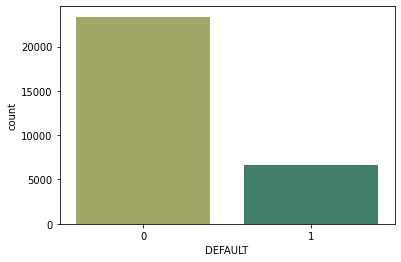

In [5]:
sns.countplot(data=data, x='DEFAULT',palette='gist_earth_r')
plt.show()

# FIX with oversampling below

In [6]:
labels=data['DEFAULT']
dataDF=data.drop(['DEFAULT'], axis=1)
oversample=SMOTE(random_state=1234)
dxX, dyy = oversample.fit_resample(dataDF, labels)

In [7]:
data=dxX
data['DEFAULT']=dyy
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,10000,1,2,1,29,1,1,2,0,0,...,9307,10084,10119,2394,0,1018,918,338,0,1
46724,120000,2,1,2,25,0,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
46725,150000,2,1,1,38,-1,-1,-2,-2,-2,...,0,0,1639,0,0,0,0,1639,10464,1
46726,50000,1,2,1,35,2,0,0,0,0,...,11919,2712,4951,1796,1446,1054,378,89,247,1


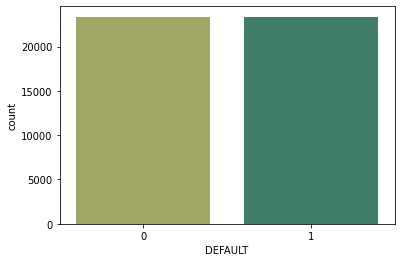

In [8]:
sns.countplot(data=data, x='DEFAULT',palette='gist_earth_r')
#plt.savefig('Oversample')
plt.show()

In [9]:
payDict={}
bilDict={}
pmtDict={}
cols=['SEX','EDUCATION','MARRIAGE','AGE','DEFAULT']
colDict={'EDUCATION':['value_counts'],
         'MARRIAGE':['value_counts'],
         'SEX':['value_counts'],
         'DEFAULT':['value_counts']}
for i in range(6):
    payDict[payHist[i]]=["mean","std","min","max"]
    bilDict[billMon[i]]=["mean","std","min","max"]
    pmtDict[paidMon[i]]=["mean","std","min","max"]

count    46728.000000
mean        35.411894
std          8.840663
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

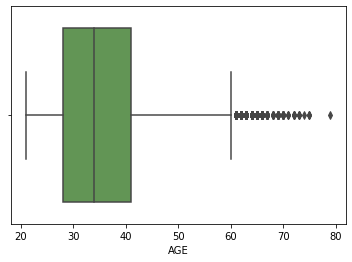

In [10]:
sns.boxplot(data['AGE'], palette='gist_earth_r')
data['AGE'].describe()

In [11]:
dfDataCols=data[cols].apply(colDict)
#dfi.export(dfDataCols,'dfDataCols.png')
dfDataCols

objc[49307]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10da53220). One of the two will be used. Which one is undefined.
[0302/145130.556198:INFO:headless_shell.cc(107)] 35551 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmp1v6z_2y0/temp.png


,EDUCATION,MARRIAGE,SEX,DEFAULT
,value_counts,value_counts,value_counts,value_counts
0,14,70.0,NaN,23364.0
1,17967,25614.0,23102.0,23364.0
2,22622,20714.0,23626.0,NaN
3,5637,330.0,NaN,NaN
4,152,NaN,NaN,NaN
5,285,NaN,NaN,NaN
6,51,NaN,NaN,NaN


In [12]:
paymntdict={'PAY_SEPT':['value_counts'], 'PAY_AUG':['value_counts'], 'PAY_JUL':['value_counts'], 
            'PAY_JUN':['value_counts'], 'PAY_MAY':['value_counts'], 'PAY_APR':['value_counts']}
dfHist=data[payHist].apply(paymntdict)
#dfi.export(dfHist, 'dfHist.png')
dfHist

objc[49321]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x1105be220). One of the two will be used. Which one is undefined.
[0302/145131.157659:INFO:headless_shell.cc(107)] 53394 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmpy9ircmpd/temp.png


,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
-2,3013,4791,5270,5645,5964,6466
-1,7637,8329,8240,8015,7818,8267
0,21829,22958,23452,24770,25727,24820
1,8149,2679,2470,2159,1962,1918
2,5348,7243,6628,5449,4577,4625
3,533,480,391,334,338,325
4,110,155,132,132,140,103
5,47,45,59,50,30,27
6,21,27,40,17,17,46


In [13]:
dfPayd=round(data[payHist].apply(payDict),2)
#dfi.export(dfPayd,'dfPayd.png')
dfPayd

objc[49332]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x112423220). One of the two will be used. Which one is undefined.
[0302/145131.756683:INFO:headless_shell.cc(107)] 23972 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmp_wgjm7zb/temp.png


,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
mean,0.17,0.04,-0.01,-0.07,-0.12,-0.16
std,1.12,1.22,1.22,1.22,1.18,1.20
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [14]:
dfBilld=round(data[billMon].apply(bilDict),2)
#dfi.export(dfBilld,'dfBilld.png')
dfBilld

objc[49343]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x112928220). One of the two will be used. Which one is undefined.
[0302/145132.365698:INFO:headless_shell.cc(107)] 37353 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmpmbbnlqg5/temp.png


,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
mean,50083.40,48406.62,46220.02,42703.22,39929.10,38689.27
std,73050.18,70930.46,68528.83,63880.98,60629.09,59359.21
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
max,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00


In [15]:
dfMonPaid=round(data[paidMon].apply(pmtDict),2)
#dfi.export(dfMonPaid,'dfMonPaid.png')
dfMonPaid

objc[49354]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x111ea3220). One of the two will be used. Which one is undefined.
[0302/145132.972766:INFO:headless_shell.cc(107)] 34870 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmpn6rg_fuw/temp.png


,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
mean,4746.69,4872.34,4447.29,4055.1,4096.86,4416.32
std,14055.35,19040.27,15605.35,13347.0,13350.95,15606.07
min,0.00,0.00,0.00,0.0,0.00,0.00
max,873552.00,1684259.00,896040.00,621000.0,426529.00,528666.00


In [16]:
pd.set_option('display.max_columns',None)
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
count,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,4.672800e+04,46728.000000,46728.000000,46728.000000,46728.000000,4.672800e+04,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000
mean,153230.884737,1.505607,1.764702,1.455915,35.411894,0.168807,0.039569,-0.010550,-0.069872,-0.122368,-0.156523,50083.403206,48406.618815,4.622002e+04,42703.217257,39929.096965,38689.274033,4746.686355,4.872343e+03,4447.290896,4055.098356,4096.862866,4416.323468,0.500000
std,125485.464163,0.499974,0.732357,0.514959,8.840663,1.120631,1.215284,1.216428,1.215399,1.183944,1.195267,73050.175588,70930.460976,6.852883e+04,63880.975256,60629.085858,59359.213576,14055.350252,1.904027e+04,15605.352813,13347.003291,13350.952229,15606.073573,0.500005
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3455.000000,2910.000000,2.607750e+03,2344.000000,1770.000000,1329.000000,625.000000,5.910000e+02,360.000000,265.000000,252.000000,188.000000,0.000000
50%,120000.000000,2.000000,2.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21403.500000,20701.500000,1.996500e+04,19068.000000,18274.000000,17593.000000,2000.000000,1.971000e+03,1537.000000,1277.000000,1335.000000,1261.000000,0.500000
75%,220000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63867.500000,61254.500000,5.815850e+04,51900.500000,49031.000000,48386.250000,4481.250000,4.233000e+03,3858.250000,3500.000000,3516.250000,3500.000000,1.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
binned=['MarriageBin','EducationBin','AgeBin']
marBin=[]
eduBin=[]
ageBin=[]
for i in range(len(data)):
    marr=data['MARRIAGE'][i]
    educ=data['EDUCATION'][i]
    ages=data['AGE'][i]
    if marr==0 or marr>3:
        marBin.append(3)
    else:
        marBin.append(marr)
    if educ>4 or educ==0:
        eduBin.append(4)
    else:
        eduBin.append(educ)
    if ages<=34:
        ageBin.append(1)
    elif ages>=35 and ages<=49:
        ageBin.append(2)
    elif ages>=50 and ages<=64:
        ageBin.append(3)
    else:
        ageBin.append(4)

        
data.insert(len(data.columns),"Marriage_Bin",marBin,True)
data.insert(len(data.columns),"Education_Bin",eduBin,True)
data.insert(len(data.columns),"Age_Bin",ageBin,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3


In [18]:
billDF=[]
for i in range(len(data)):
    totalBill=0
    for j in billMon:
        totalBill+=data[j][i]
    avgBill=totalBill/6
    billDF.append(avgBill)
payDF=[]
for i in range(len(data)):
    totalPaid=0
    for j in paidMon:
        totalPaid+=data[j][i]
    avgPay=totalPaid/6
    payDF.append(avgPay)

data.insert(len(data.columns),"Avg_Bill_Amt",billDF,True)
data.insert(len(data.columns),"Avg_Pmt_Amt",payDF,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin,Avg_Bill_Amt,Avg_Pmt_Amt
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1,1284.000000,114.833333
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1,2846.166667,833.333333
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1,16942.166667,1836.333333
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2,38555.666667,1398.000000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3,18223.166667,9841.500000


In [19]:
## Pay Ratio
payRatio = ('AugPayRat','JulPayRat','JunPayRat','MayPayRat','AprPayRat')
for i, j, l in zip(billMon[1:], payRatio, paidMon[:-1]):
    df=[]
    for k in range(len(data)):
        pay=data[l][k]
        bal=data[i][k]
        if pay==0 and bal==0:
            G=1
        elif pay!=0 and bal==0:
            G=1
        else:
            G=pay/bal
        df.append(G)
    data.insert(len(data.columns),j,df,True)

avgPRdf=[]
for i in range(len(data)):
    totalPR=0
    for j in payRatio:
        totalPR+=data[j][i]
    avgPR=totalPR/5
    avgPRdf.append(avgPR)
data.insert(len(data.columns),'Avg_Pmt_Ratio',avgPRdf,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin,Avg_Bill_Amt,Avg_Pmt_Amt,AugPayRat,JulPayRat,JunPayRat,MayPayRat,AprPayRat,Avg_Pmt_Ratio
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1,1284.000000,114.833333,0.000000,1.000000,1.000000,1.000000,1.000000,0.800000
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1,2846.166667,833.333333,0.000000,0.372856,0.305623,0.289436,0.000000,0.193583
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1,16942.166667,1836.333333,0.108220,0.110628,0.069779,0.066899,0.064313,0.083968
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2,38555.666667,1398.000000,0.041465,0.040961,0.042382,0.037985,0.036180,0.039794
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3,18223.166667,9841.500000,0.352734,1.023608,0.477555,0.470072,0.036015,0.471997


In [20]:
## Utilization
monthlyUtilize = ('SeptUtil','AugUtil','JulUtil','JunUtil','MayUtil','AprUtil')
for i, j in zip(billMon, monthlyUtilize):
    df=[]
    for k in range(len(data)):
        df.append((data[i][k]/data['LIMIT_BAL'][k]))
    data.insert(len(data.columns),j,df,True)
utilDF=[]
for i in range(len(data)):
    totalUtil=0
    for j in monthlyUtilize:
        totalUtil+=data[j][i]
    avgUtil=totalUtil/6
    utilDF.append(avgUtil)
data.insert(len(data.columns),'Avg_Util',utilDF,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin,Avg_Bill_Amt,Avg_Pmt_Amt,AugPayRat,JulPayRat,JunPayRat,MayPayRat,AprPayRat,Avg_Pmt_Ratio,SeptUtil,AugUtil,JulUtil,JunUtil,MayUtil,AprUtil,Avg_Util
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1,1284.000000,114.833333,0.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.064200
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1,2846.166667,833.333333,0.000000,0.372856,0.305623,0.289436,0.000000,0.193583,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.023718
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1,16942.166667,1836.333333,0.108220,0.110628,0.069779,0.066899,0.064313,0.083968,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.188246
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2,38555.666667,1398.000000,0.041465,0.040961,0.042382,0.037985,0.036180,0.039794,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.771113
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3,18223.166667,9841.500000,0.352734,1.023608,0.477555,0.470072,0.036015,0.471997,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.364463


In [21]:
# 6 month growth
balGrow=[]
utilGrow=[]
for i in range(len(data)):
    septBill=data['BILL_AMT_SEP'][i]
    aprBill =data['BILL_AMT_APR'][i]
    if septBill==0 and aprBill==0:
        balGrow.append(1)
    elif septBill!=0 and aprBill==0:
        balGrow.append(septBill)
    else:
        balGrow.append((septBill-aprBill)/aprBill)
for i in range(len(data)):
    septUtil=data['SeptUtil'][i]
    aprUtil =data['AprUtil'][i]
    if septUtil==0 and aprUtil==0:
        utilGrow.append(1)
    elif septUtil!=0 and aprUtil==0:
        utilGrow.append(septUtil)
    else:
        utilGrow.append((septUtil-aprUtil)/aprUtil)
data.insert(len(data.columns),'Bal_Growth_6mo',balGrow,True)
data.insert(len(data.columns),'Util_Growth_6mo',utilGrow,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin,Avg_Bill_Amt,Avg_Pmt_Amt,AugPayRat,JulPayRat,JunPayRat,MayPayRat,AprPayRat,Avg_Pmt_Ratio,SeptUtil,AugUtil,JulUtil,JunUtil,MayUtil,AprUtil,Avg_Util,Bal_Growth_6mo,Util_Growth_6mo
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1,1284.000000,114.833333,0.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.064200,3913.000000,0.195650
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1,2846.166667,833.333333,0.000000,0.372856,0.305623,0.289436,0.000000,0.193583,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.023718,-0.177553,-0.177553
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1,16942.166667,1836.333333,0.108220,0.110628,0.069779,0.066899,0.064313,0.083968,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.188246,0.880442,0.880442
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2,38555.666667,1398.000000,0.041465,0.040961,0.042382,0.037985,0.036180,0.039794,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.771113,0.590348,0.590348
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3,18223.166667,9841.500000,0.352734,1.023608,0.477555,0.470072,0.036015,0.471997,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.364463,-0.549579,-0.549579


In [22]:
# Largest Bill
bigBill=data[billMon].max(axis=1)
data.insert(len(data.columns),'Max_Bill_Amt',bigBill,True)

In [23]:
# Largest Payment
bigPaid=data[paidMon].max(axis=1)
data.insert(len(data.columns),'Max_Pmt_Amt',bigPaid,True)

In [24]:
## Ratio between largest payment and bill
numerator=bigPaid
denominator=bigBill
X=[]
for num, den in zip(numerator, denominator):
    if num == 0 and den == 0:
        X.append(1)
    elif num != 0 and den == 0:
        X.append(num)
    else:
        X.append(num/den)
bigRatio=X
data.insert(len(data.columns),'Max_Ratio',bigRatio,True)

In [25]:
# Max delinquency of payment
maxDLQ=data[payHist].max(axis=1)
for i in range(len(maxDLQ)):
    if maxDLQ[i]<0:
        maxDLQ[i]=0
data.insert(len(data.columns),'Max_DLQ',maxDLQ,True)

In [26]:
## Utilization change
crntUtil=data['SeptUtil']
utils=['SeptUtil','AugUtil','JulUtil','JunUtil','MayUtil','AprUtil',]
minUtil=data[utils].min(axis=1)
utilDelta=crntUtil-minUtil
data.insert(len(data.columns),'Util_Delta',utilDelta,True)

In [27]:
## sept bill-bal limit
debt=data['LIMIT_BAL']-data['BILL_AMT_SEP']
data.insert(len(data.columns),'Amt_Left',debt,True)

# Split into train,test,validate

In [28]:
random.seed(1234)
train=[]
test=[]
validate=[]
for i in range(len(data)):
    x=random.random()
    if x<.7:
        train.append(1)
        test.append(0)
        validate.append(0)
    elif x>=.7 and x<.9:
        train.append(0)
        test.append(1)
        validate.append(0)
    else:
        train.append(0)
        test.append(0)
        validate.append(1)
data.insert(len(data.columns),'train',train,True)
data.insert(len(data.columns),'test',test,True)
data.insert(len(data.columns),'validate',validate,True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,Marriage_Bin,Education_Bin,Age_Bin,Avg_Bill_Amt,Avg_Pmt_Amt,AugPayRat,JulPayRat,JunPayRat,MayPayRat,AprPayRat,Avg_Pmt_Ratio,SeptUtil,AugUtil,JulUtil,JunUtil,MayUtil,AprUtil,Avg_Util,Bal_Growth_6mo,Util_Growth_6mo,Max_Bill_Amt,Max_Pmt_Amt,Max_Ratio,Max_DLQ,Util_Delta,Amt_Left,train,test,validate
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,1,1284.000000,114.833333,0.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.064200,3913.000000,0.195650,3913,689,0.176080,2,0.195650,16087,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,2,1,2846.166667,833.333333,0.000000,0.372856,0.305623,0.289436,0.000000,0.193583,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.023718,-0.177553,-0.177553,3455,2000,0.578871,2,0.007975,117318,1,0,0
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,2,1,16942.166667,1836.333333,0.108220,0.110628,0.069779,0.066899,0.064313,0.083968,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.188246,0.880442,0.880442,29239,5000,0.171004,0,0.174222,60761,1,0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,2,2,38555.666667,1398.000000,0.041465,0.040961,0.042382,0.037985,0.036180,0.039794,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.771113,0.590348,0.590348,49291,2019,0.040961,0,0.373520,3010,0,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,2,3,18223.166667,9841.500000,0.352734,1.023608,0.477555,0.470072,0.036015,0.471997,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.364463,-0.549579,-0.549579,35835,36681,1.023608,0,0.058940,41383,0,0,1


In [29]:
hdrs=['train','test','validate']
x=[]
for i in hdrs:
    x.append(round((data[i]==1).sum()/len(data)*100,4))
mydata=[[hdrs],[x]]
print(tabulate(mydata))

-----------------------------
['train', 'test', 'validate']
[70.11, 19.9302, 9.9598]
-----------------------------


In [30]:
## Split data sets
train=data[data['train']==1]
test=data[data['test']==1]
validate=data[data['validate']==1]

## drop test, train, validate  variables
train=train.drop(['AGE','EDUCATION','MARRIAGE','train','test','validate'],axis=1)
test=test.drop(['AGE','EDUCATION','MARRIAGE','train','test','validate'],axis=1)
validate=validate.drop(['AGE','EDUCATION','MARRIAGE','train','test','validate'],axis=1)

In [31]:
# pop Default
colList=payHist+billMon+paidMon
trainDefault=train['DEFAULT']
train=train.drop(columns=colList)
testDefault=test['DEFAULT']
test=test.drop(columns=colList)
validateDefault=validate['DEFAULT']
validate=validate.drop(columns=colList)

# Traditional EDA

In [32]:
def barstack(X):
    varName=[X,"DEFAULT"]
    df=train[varName]
    plot=sns.countplot(data=df,x=X,hue='DEFAULT',palette='gist_earth_r')
    plt.title(X+' Stacked Barplot')
    return plot

In [33]:
def edaBox(X,lm=(None,None)):
    plot=sns.boxplot(data=train,y=X,x="DEFAULT", hue="DEFAULT",palette='gist_earth_r')
    plt.ylim(lm)
    plt.title(X+' Box Plot')
    return plot

In [34]:
def stats(X):
    df0=train[train["DEFAULT"]==0]
    df1=train[train["DEFAULT"]==1]
    head=['Default','Mean','STD','Median','Min','Max']
    ddf0={"Default":0,
          "Mean": np.mean(df0[X]),
          "STD" : np.std(df0[X]),
          "Median" : np.median(df0[X]),
          "Min" : np.min(df0[X]),
          "Max" : np.max(df0[X])}
    ddf1={"Default":1,
          "Mean": np.mean(df1[X]),
          "STD" : np.std(df1[X]),
          "Median" : np.median(df1[X]),
          "Min" : np.min(df1[X]),
          "Max" : np.max(df1[X])}
    df=pd.DataFrame(data=[ddf0,ddf1])
    tbl=df
    print(tabulate(df,headers=head,tablefmt='grid',floatfmt=".2f"))
    return tbl
    # mean, std, median, min, max, PER DEFAULT SCORE

In [36]:
marBin=barstack('Marriage_Bin')
#plt.savefig('MarBinBar')
marBin

In [37]:
eduBin=barstack('Education_Bin')
#plt.savefig('EduBinBar')

In [38]:
BG6=stats('Bal_Growth_6mo')
#dfi.export(BG6,'BalGrow6.png',table_conversion='matplotlib')

In [39]:
UtilGrow6=edaBox('Util_Growth_6mo', (-5,10))
#plt.savefig('UtilGrow6')

In [40]:
UG6=stats('Util_Growth_6mo')
#dfi.export(UG6,'UG6stats.png',table_conversion='matplotlib')

In [41]:
APR=stats("Avg_Pmt_Ratio")
#dfi.export(APR,'AvgPmtRat.png',table_conversion='matplotlib')

In [42]:
APA=stats("Avg_Pmt_Amt")
#dfi.export(APA,'AvgPmtAmtStats.png',table_conversion='matplotlib')

In [ ]:
APAplt=edaBox("Avg_Pmt_Amt",(-1000,30000))
#plt.savefig('AvgPmtAmt')

In [43]:
AvgUtil=edaBox("Avg_Util",(-1,3))
#plt.savefig('AvgUtil')

In [ ]:
AVGutil=stats("Avg_Util")
#dfi.export(AVGutil,'AvgUtilStats.png',table_conversion='matplotlib')

In [44]:
MBA=edaBox("Max_Bill_Amt",(-10000,200000))
#plt.savefig('MaxBillAmt')

In [45]:
MBAstat=stats("Max_Bill_Amt")
#dfi.export(MBAstat,'MaxBillAmtStats.png',table_conversion='matplotlib')

In [46]:
mxRat=edaBox('Max_Ratio')
#plt.savefig('MaxRatio')

In [47]:
MXR=stats('Max_Ratio')
#dfi.export(MXR,'MaxRatioStats.png',table_conversion='matplotlib')

In [48]:
mDLQ=barstack('Max_DLQ')
#plt.savefig('MaxDLQ')

In [49]:
uDelta=edaBox('Util_Delta',(-0.1,None))
#plt.savefig('UtilDelta')

In [50]:
utilDelta=stats('Util_Delta')
#dfi.export(utilDelta,'UtilDeltaStats.png',table_conversion='matplotlib')

In [51]:
amtLeft=stats('Amt_Left')
#dfi.export(amtLeft,'AmtLeftStats.png',table_conversion='matplotlib')

In [ ]:
AL=edaBox('Amt_Left')
#plt.savefig('AmtLeft')

## Model Based EDA

In [53]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    for i in cols[~cols.isin([target])]:
        if (data[i].dtype.kind in 'bifc') and (len(np.unique(data[i]))>15):
            binned_x=pd.qcut(data[i], bins, duplicates='drop')
            d0=pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0=pd.DataFrame({'x': data[i], 'y': data[target]})
        d=d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns=['Cutoff', 'N', 'Events']
        d['% of Events']=np.maximum(d['Events'], 0.5)/d['Events'].sum()
        d['Non-Events']=d['N']-d['Events']
        d['% of Non-Events']=np.maximum(d['Non-Events'], 0.5)/d['Non-Events'].sum()
        d['WoE']=np.log(d['% of Events']/d['% of Non-Events'])
        d['IV']=d['WoE']*(d['% of Events']-d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=i)
        #print("Information value of "+i+" is "+str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [i], "IV" : [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [54]:
iv, woe = iv_woe(train, target='DEFAULT', bins=4,show_woe=False)

Information value of LIMIT_BAL is 0.16511
Information value of SEX is 0.19188
Information value of Marriage_Bin is 0.166709
Information value of Education_Bin is 0.083918
Information value of Age_Bin is 0.008917
Information value of Avg_Bill_Amt is 0.005721
Information value of Avg_Pmt_Amt is 0.191523
Information value of AugPayRat is 0.091604
Information value of JulPayRat is 0.084036
Information value of JunPayRat is 0.06307
Information value of MayPayRat is 0.052
Information value of AprPayRat is 0.05704
Information value of Avg_Pmt_Ratio is 0.119813
Information value of SeptUtil is 0.06277
Information value of AugUtil is 0.080296
Information value of JulUtil is 0.091872
Information value of JunUtil is 0.108128
Information value of MayUtil is 0.110865
Information value of AprUtil is 0.110455
Information value of Avg_Util is 0.10901
Information value of Bal_Growth_6mo is 0.092095
Information value of Util_Growth_6mo is 0.059402
Information value of Max_Bill_Amt is 0.022201
Informatio

In [55]:
ivLow=iv[iv.IV>0.08]
woeList=list(ivLow.Variable)
woeList.append('DEFAULT')
print(woeList)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


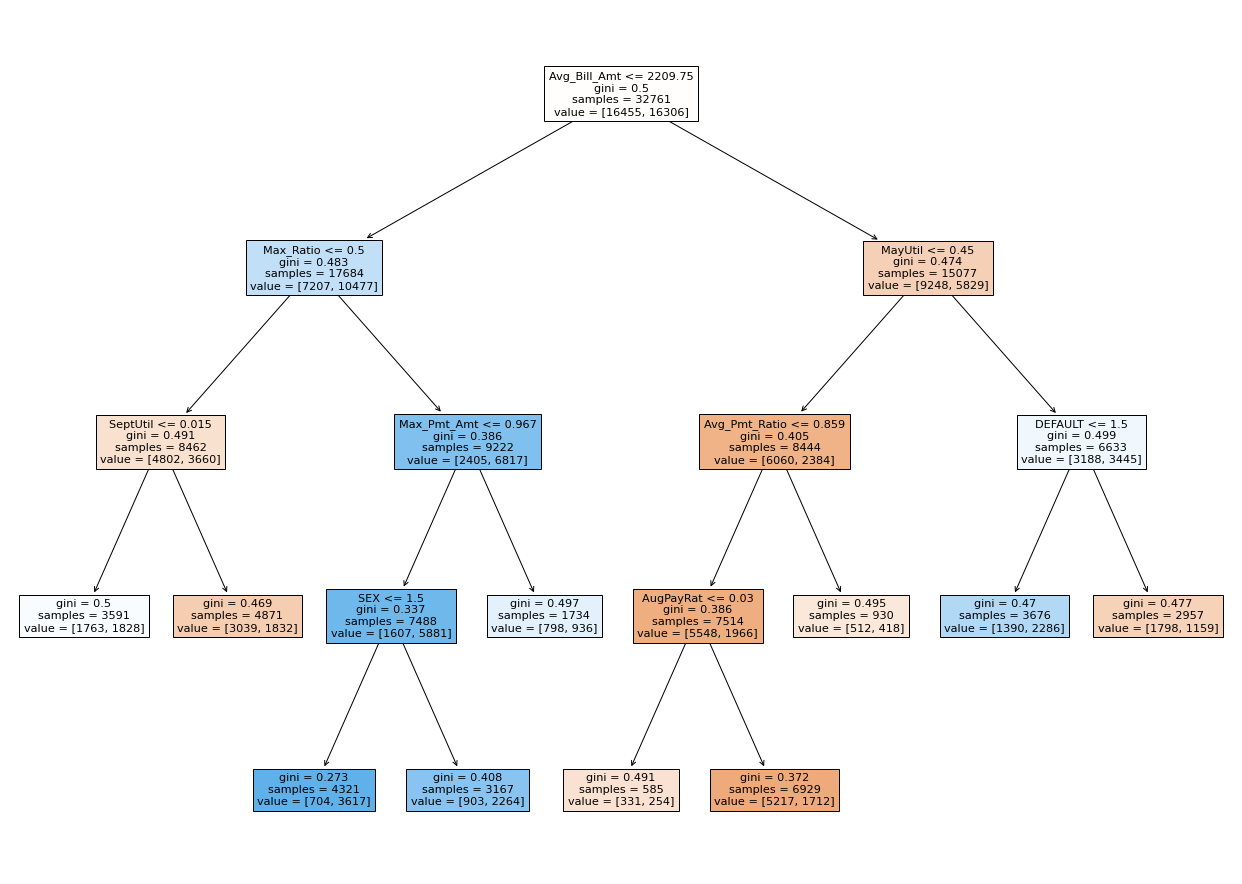

In [57]:
dtcDF=data.copy(deep=True)
dtcY=dtcDF.pop('DEFAULT')
dtcDF.pop('train')
dtcDF.pop('test')
dtcDF.pop('validate')
warnings.simplefilter(action='ignore', category=FutureWarning)
params={"criterion":['gini','entropy'],"splitter":['best'],"max_depth":range(3,10),
        "min_samples_split": range(5000,15000,1000), "max_features":['sqrt','log2']}
clfDT=DecisionTreeClassifier(random_state=1234)
clf_dt=GridSearchCV(clfDT,param_grid=params, cv=10,scoring='accuracy',verbose=1,n_jobs=-1)
clf_dt.fit(dtcDF,dtcY)
locals().update(clf_dt.best_params_)
clf=DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=max_depth,
                           min_samples_split=min_samples_split,max_features=max_features,random_state=1234)
trainDF=train.copy(deep=True)
trainDF.pop('DEFAULT')
clf.fit(trainDF,trainDefault)
plt.figure(figsize=(22,16))
plot_tree(clf,feature_names=list(train.columns),filled=True)
plt.savefig('DecisionTree')
plt.show()

In [58]:
ftImport=clf.feature_importances_
ftList=clf.feature_names_in_
dtcFeats=ftList[ftImport>0]
dtcFeats=list(dtcFeats)
dtcFeats.append('DEFAULT')
#print(dtcFeats)

## OneR classifier

In [60]:
def get_feature_quartiles(X,lst,t=False):
    X=X.drop(["DEFAULT"], axis=1)
    if t == True:
        X=X[lst]
    X_discretized = X.copy()
    X_discretized=X_discretized.to_numpy()
    for col in range(X.shape[1]):
        for q, class_label in zip([1.0, 0.75, 0.5, 0.25], [3, 2, 1, 0]):
            threshold = np.quantile(X.iloc[:, col], q=q)
            X_discretized[X.iloc[:, col] <= threshold, col] = class_label
    return X_discretized.astype(np.int)

In [61]:
## All Features
train_disc=get_feature_quartiles(train,0)
oner=OneRClassifier()
oner.fit(train_disc,trainDefault)
ytrainOneR=oner.predict(train_disc)
train_acc = np.mean(ytrainOneR == trainDefault)  
print(f'Training accuracy {train_acc*100:.3f}%')
testDisc=get_feature_quartiles(test,0)
yOneRPred=oner.predict(testDisc)
OneRAcc=np.mean(yOneRPred == testDefault)  
print(f'Test accuracy {OneRAcc*100:.3f}%')

Training accuracy 68.557%
Test accuracy 68.936%


In [62]:
## WOE features
ftList=woeList.copy()
ftList.remove('DEFAULT')
train_disc=get_feature_quartiles(train,ftList,True)
oner=OneRClassifier()
oner.fit(train_disc,trainDefault)
ytrainOneR=oner.predict(train_disc)
train_acc = np.mean(ytrainOneR == trainDefault)  
print(f'Training accuracy {train_acc*100:.3f}%')
testDisc=get_feature_quartiles(test,ftList,True)
yOneRPred=oner.predict(testDisc)
OneRAcc=np.mean(yOneRPred == testDefault)  
print(f'Test accuracy {OneRAcc*100:.3f}%')

Training accuracy 68.557%
Test accuracy 68.936%


In [63]:
## Decision Tree features
ftList=dtcFeats.copy()
ftList.remove('DEFAULT')
train_disc=get_feature_quartiles(train,ftList,True)
oner=OneRClassifier()
oner.fit(train_disc,trainDefault)
ytrainOneR=oner.predict(train_disc)
train_acc = np.mean(ytrainOneR == trainDefault)  
print(f'Training accuracy {train_acc*100:.3f}%')
testDisc=get_feature_quartiles(test,ftList,True)
yOneRPred=oner.predict(testDisc)
OneRAcc=np.mean(yOneRPred == testDefault)  
print(f'Test accuracy {OneRAcc*100:.3f}%')

Training accuracy 68.557%
Test accuracy 68.936%


# Random Forest, Logistic, Gradient Boosted Trees, SVM

In [64]:
def training_models(Parameters, Model, DFtrain, DFtest, Modelname):
    start=datetime.now()
    datatrain=DFtrain.copy()
    X_train=datatrain.drop('DEFAULT',axis=1)
    y_train=datatrain['DEFAULT']
    datatest=DFtest.copy()
    X_test=datatest.drop('DEFAULT',axis=1)
    y_test=datatest['DEFAULT']
    sf = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    for i, j in sf.split(X_train, y_train):
        sf_x_train, sf_y_train = X_train.iloc[i], y_train.iloc[i]
        
    for i,j in sf.split(X_test,y_test):
        sf_x_test, sf_y_test = X_test.iloc[j], y_test.iloc[j]
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    mdl_params = Parameters
    mdl_keys = Parameters.keys()
    rndm_modl=RandomizedSearchCV(Model, mdl_params, n_iter=4, random_state=1234)
    beep.beep(1)
    for i, j in sf.split(sf_x_train,sf_y_train):
        pipe=imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', random_state=1234), rndm_modl)
        fittingModel = pipe.fit(sf_x_train[i],sf_y_train[i])
        best_model=rndm_modl.best_estimator_
    sm=SMOTE(sampling_strategy='minority',random_state=1234)
    smx_train, smy_train = sm.fit_resample(sf_x_train, sf_y_train)
    beep.beep(1)
    final_mdl = rndm_modl.best_estimator_
    final_params = best_model.get_params()
    final_mdl.fit(smx_train, smy_train)
    
    y_trainPred=final_mdl.predict(X_train)
    model={}
    model['Model Type'] = Modelname
    model['Accuracy (Train)'] = round((accuracy_score(y_train, y_trainPred)*100),2)
    model['Precision (Train)'] = round(precision_score(y_train,y_trainPred),2)
    model['Recall (Train)'] = round(recall_score(y_train,y_trainPred),2)
    model['ROC-AUC Score (Train)'] = round(roc_auc_score(y_train, y_trainPred),2)
    cm=confusion_matrix(y_true=y_train, y_pred=y_trainPred)
    CMD=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_mdl.classes_)
    model['False Positive Rate (Train)']=round(cm[0,1]/(cm[0,1]+cm[0,0]),2)
    y_prediction=final_mdl.predict(X_test)
    used_params={}
    for i,j in Parameters.items():
        for k,l in final_params.items():
            if i==k:
                used_params[i] = l
    
    model['Accuracy (Test)'] = str(round((accuracy_score(y_test, y_prediction)*100),2)) + "%"
    model['Precision (Test)'] = round(precision_score(y_test,y_prediction),2)
    model['Recall (Test)'] = round(recall_score(y_test,y_prediction),2)
    model['ROC-AUC Score (Test)'] = round(roc_auc_score(y_test, y_prediction),2)
    cm=confusion_matrix(y_true=y_test, y_pred=y_prediction)
    cm=cm/cm.astype(np.float32).sum(axis=1)
    CMD=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_mdl.classes_)
    CMD.plot(cmap='gist_earth')
    model['False Positive Rate (Test)']=round(cm[0,1]/(cm[0,1]+cm[0,0]),2)
    stop=datetime.now()
    #print("Function Run Time : ", (stop-start))
    beep.beep(4)
    return model, final_mdl, CMD

In [65]:
def importancePlot(Model, lst=None, check=False):
    DF=train.copy()
    if check==True:
        DF=DF[lst]
    DF.pop('DEFAULT')
    importances=Model.feature_importances_
    feature_importance=100*(importances/importances.max())
    feat_importances=pd.Series(feature_importance, index=DF.columns)
    sorted_idx=np.argsort(importances)
    Y=feat_importances.nlargest(10)
    X=Y.index
    sns.set_color_codes("muted")
    graph=sns.barplot(y=X,x=Y,color='b')
    return graph

# Random Forest

In [66]:
mdlName='Random Forest (All features)'
params={"criterion":['entropy','gini'],"max_depth":[2,3,4,5], 
        "min_samples_split": [500,1000,2500,5000],'max_features':['auto','sqrt','log2']}
RFCall, RFCmodel, RFCallCMD = training_models(params, RandomForestClassifier(random_state=1234),train, test, mdlName)

In [67]:
RFCallCMD.plot(cmap='gist_earth')
plt.title('Random Forest (All features)')
#plt.savefig('RFC_All_CMD')

In [68]:
RFCallIP=importancePlot(RFCmodel)
RFCallIP.set_title('Random Forest Feature Importance Plot (all features)')
RFCallIP.set_xlabel('Percentage of Importance')
#plt.savefig('RFC_all_IP')

In [69]:
mdlName='Random Forest (WOE selected features)'
params={"criterion":['entropy','gini'],"max_depth":[2,3,4,5], 
        "min_samples_split": [500,1000,2500,5000],'max_features':['auto','sqrt','log2']}
RFCselectWOE, RFCmodelWOESelect, RFC_WoE_CMD=training_models(params, RandomForestClassifier(random_state=1234),train[woeList], test[woeList], mdlName)

In [70]:
RFC_WoE_CMD.plot(cmap='gist_earth')
plt.title('Random Forest (WoE features)')
#plt.savefig('RFC_WoW_CMD')

In [71]:
RFCWoEIP=importancePlot(RFCmodelWOESelect, woeList, True)
RFCWoEIP.set_title('Random Forest Feature Importance Plot (WoE features)')
RFCWoEIP.set_xlabel('Percentage of Importance')
#plt.savefig('RFC_WoE_IP')

In [72]:
mdlName='Random Forest (Decision Tree selected features)'
params={"criterion":['entropy','gini'],"max_depth":[2,3,4,5], 
        "min_samples_split": [500,1000,2500,5000],'max_features':['auto','sqrt','log2']}
RFCselectdtc, RFCmodelDTCSelect, RFC_DTC_CMD=training_models(params, RandomForestClassifier(random_state=1234),train[dtcFeats], test[dtcFeats], mdlName)

In [73]:
RFC_DTC_CMD.plot(cmap='gist_earth')
plt.title('Random Forest (Decision Tree features)')
#plt.savefig('RFC_DTC_CMD')

In [74]:
RFC_DTC_IP=importancePlot(RFCmodelDTCSelect, dtcFeats, True)
RFC_DTC_IP.set_title('Random Forest Feature Importance Plot (Decision Tree features)')
RFC_DTC_IP.set_xlabel('Percentage of Importance')
#plt.savefig('RFC_DTC_IP')

# Gradient Boosting

In [75]:
mdlName='Gradient Boosting (All features)'
params={"criterion":['friedman_mse', 'squared_error'],"max_depth":[2,3,4], 'learning_rate':[0.01,0.1,0.5],
        "min_samples_split": [1000,2500,5000],'max_features':['auto','sqrt','log2']}
GBMall, GBallModel, GBallCMD =training_models(params,GradientBoostingClassifier(random_state=1234),train, test, mdlName)

In [76]:
GBallCMD.plot(cmap='gist_earth')
plt.title('Gradient Boosting (All features)')
#plt.savefig('GB_all_CMD')

In [77]:
GBallIP=importancePlot(GBallModel)
GBallIP.set_title('Gradient Boosting Feature Importance Plot (All features)')
GBallIP.set_xlabel('Percentage of Importance')
#plt.savefig('GB_all_IP')

In [78]:
mdlName='Gradient Boosting (WOE selected features)'
params={"criterion":['friedman_mse', 'squared_error'],"max_depth":[2,3,4], 'learning_rate':[0.01,0.1,0.5],
        "min_samples_split": [1000,2500,5000],'max_features':['auto','sqrt','log2']}
GBMselectWOE, GBselectWOEModel, GBwoeCMD=training_models(params,GradientBoostingClassifier(random_state=1234),
                          train[woeList], test[woeList], mdlName)

In [79]:
GBwoeCMD.plot(cmap='gist_earth')
plt.title('Gradient Boosting (WoE features)')
#plt.savefig('GB_WoE_CMD')

In [80]:
GBwoeIP=importancePlot(GBselectWOEModel, woeList, True)
GBwoeIP.set_title('Gradient Boosting Feature Importance Plot (WoE features)')
GBwoeIP.set_xlabel('Percentage of Importance')
#plt.savefig('GB_WoE_IP')

In [81]:
mdlName='Gradient Boosting (Decision Tree selected features)'
params={"criterion":['friedman_mse', 'squared_error'],"max_depth":[2,3,4], 'learning_rate':[0.01,0.1,0.5],
        "min_samples_split": [1000,2500,5000],'max_features':['auto','sqrt','log2']}
GBMselectDTC, GBselectDTCModel, GBdtcCMD=training_models(params,GradientBoostingClassifier(random_state=1234),
                          train[dtcFeats], test[dtcFeats], mdlName)

In [82]:
GBdtcCMD.plot(cmap='gist_earth')
plt.title('Gradient Boosting (Decision Tree features)')
#plt.savefig('GB_DTC_CMD')

In [83]:
GBdtcIP=importancePlot(GBselectDTCModel, dtcFeats, True)
GBdtcIP.set_title('Gradient Boosting Feature Importance Plot (Decision Tree features)')
GBdtcIP.set_xlabel('Percentage of Importance')
#plt.savefig('GB_DTC_IP')

# Logistic Regression

Function Run Time :  0:00:18.170361


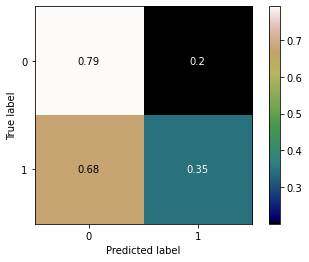

In [84]:
mdlName='Logistic Regression (All features)'
params={'solver': ['lbfgs','newton-cg','saga'],'penalty':['l1','l2','elasticnet']}
LOGall, LOGmodelAll, LOGallCMD=training_models(params, LogisticRegression(random_state=1234),train, test, mdlName)

In [85]:
LOGallCMD.plot(cmap='gist_earth')
plt.title('Logistic Regression (All features)')
#plt.savefig('Log_all_CMD')

In [86]:
X=train.copy(deep=True)
X.pop('DEFAULT')
y=trainDefault.copy()
lg=sm.OLS(y,X)
result=lg.fit()
print(result.summary())

In [87]:
X=train.copy()
Y=X['DEFAULT']
X.pop('DEFAULT')
Y=Y.values
model=ExtraTreesClassifier(n_estimators=10)
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ETCfeats=(feat_importances.nlargest(10).index)
ETCfeats=list(ETCfeats)
ETCfeats+=['DEFAULT']
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Function Run Time :  0:00:08.044230


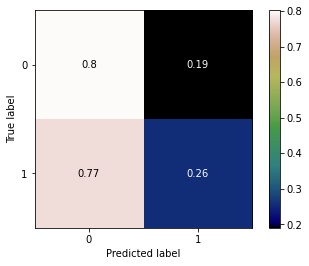

In [88]:
mdlName='Logistic Regression (ETC features)'
params={'solver': ['lbfgs','newton-cg','saga'],'penalty':['l1','l2','elasticnet']}
LOGselectETC, LOGETCmodel, LOGetcCMD=training_models(params, LogisticRegression(random_state=1234),train[ETCfeats], test[ETCfeats], mdlName)

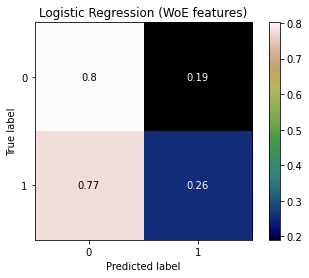

In [89]:
LOGetcCMD.plot(cmap='gist_earth')
plt.title('Logistic Regression (WoE features)')
plt.savefig('Log_WoE_CMD')

In [90]:
X=train.copy(deep=True)
X=X[ETCfeats]
X.pop('DEFAULT')
y=trainDefault.copy()
lg=sm.OLS(y,X)
result=lg.fit()
print(result.summary())

Function Run Time :  0:00:07.663818


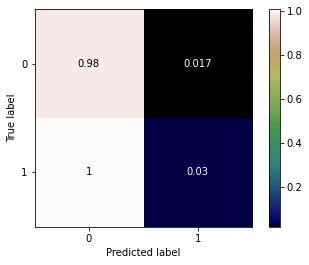

In [91]:
mdlName='Logistic Regression (Decision tree selected features)'
params={'solver': ['lbfgs','newton-cg','saga'],'penalty':['l1','l2','elasticnet']}
LOGselectDTC, LOGDTCmodel, LOGdtcCMD=training_models(params, LogisticRegression(random_state=1234),train[dtcFeats], test[dtcFeats], mdlName)

In [92]:
LOGdtcCMD.plot(cmap='gist_earth')
plt.title('Logistic Regression (Decision Tree features)')
#plt.savefig('Log_DTC_CMD')

In [93]:
X=train.copy(deep=True)
X=X[dtcFeats]
X.pop('DEFAULT')
y=trainDefault.copy()
lg=sm.OLS(y,X)
result=lg.fit()
print(result.summary())

# SVM

In [94]:
mdlName='SVM (All Features)'
params={'degree':[3], 'max_iter' : [-1]}
SVMall, SVMallModel, SVMallCMD =training_models(params,SVC(random_state=1234),train, test, mdlName)

In [95]:
SVMallCMD.plot(cmap='gist_earth')
plt.title('SVM (All features)')
#plt.savefig('SVM_all_CMD')

In [96]:
mdlName='SVM (WOE select Features)'
params={'degree':[3], 'max_iter' : [-1]}
SVMselectWOE, SVMselectWOEModel, SVMwoeCMD=training_models(params,SVC(random_state=1234),train[woeList], test[woeList], mdlName)

In [97]:
SVMwoeCMD.plot(cmap='gist_earth')
plt.title('SVM (WoE features)')
#plt.savefig('SVM_WoE_CMD')

In [98]:
mdlName='SVM (Decision Tree select Features)'
params={'degree':[3], 'max_iter' : [-1]}
SVMselectDTC, SVMselectDTCModel, SVMdtcCMD=training_models(params,SVC(random_state=1234),train[dtcFeats], test[dtcFeats], mdlName)

In [99]:
SVMdtcCMD.plot(cmap='gist_earth')
plt.title('SVM (Decision Tree features)')
#plt.savefig('SVM_DTC_CMD')

In [100]:
AllModels=[RFCall, RFCselectWOE, RFCselectdtc, GBMall, GBMselectWOE, GBMselectDTC,
           LOGall, LOGselectETC, LOGselectDTC, SVMall, SVMselectWOE, SVMselectDTC]
mdls=pd.DataFrame()
for i in AllModels:
    X=pd.DataFrame.from_dict(i,orient='index').transpose()
    mdls=mdls.append(X, ignore_index=True)

In [103]:
ModelsTrain = pd.DataFrame(columns=['Model Type','Accuracy (Train)','Precision (Train)','Recall (Train)',
                                    'ROC-AUC Score (Train)','False Positive Rate (Train)'])
trainCols=list(ModelsTrain.columns)
ModelsTrain=mdls[trainCols]
ModelsTrain

,Model Type,Accuracy (Train),Precision (Train),Recall (Train),ROC-AUC Score (Train),False Positive Rate (Train)
0,Logistic Regression (All features),57.13,0.63,0.34,0.57,0.2
1,Logistic Regression (ETC features),53.27,0.57,0.25,0.53,0.19
2,Logistic Regression (Decision tree selected fe...,50.86,0.64,0.03,0.51,0.02


In [104]:
ModelsTest =  pd.DataFrame(columns=['Model Type','Accuracy (Test)','Precision (Test)','Recall (Test)',
                                    'ROC-AUC Score (Test)', 'False Positive Rate (Test)'])
testCols=list(ModelsTest.columns)
ModelsTest=mdls[testCols]
ModelsTest

,Model Type,Accuracy (Test),Precision (Test),Recall (Test),ROC-AUC Score (Test),False Positive Rate (Test)
0,Logistic Regression (All features),56.52%,0.63,0.35,0.57,0.2
1,Logistic Regression (ETC features),52.37%,0.57,0.26,0.53,0.19
2,Logistic Regression (Decision tree selected fe...,49.72%,0.64,0.03,0.51,0.02


## Validation of Logistic Regression

In [106]:
paramNames=train.columns
paramNames=paramNames.drop('DEFAULT')
paramNames=list(paramNames)
prNm=[]
for i in paramNames:
    prNm.append(i)

In [107]:
eqnVals=(LOGmodelAll.coef_[0])

In [108]:
pd.options.display.precision=10
hds=['Variable','Coefficient']
LogTable=pd.DataFrame([prNm,eqnVals.astype(float)],index=hds)#,columns=hds)

In [109]:
LogTable=LogTable.transpose()
LogTable
dfi.export(LogTable,'LogEqnTable.png')

objc[49522]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10d9b0220). One of the two will be used. Which one is undefined.
[0302/145327.783702:INFO:headless_shell.cc(107)] 106066 bytes written to file /var/folders/z0/2nfft5dd2dx17nkh21ym23300000gn/T/tmpdk9cwi8q/temp.png
objc[49536]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4ecf35a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10feb7220). One of the two will be used. Which one is undefined.
[0302/145328.409327:INFO:headl

In [110]:
LOGmodelAll.get_params

<bound method BaseEstimator.get_params of LogisticRegression(penalty='l1', random_state=1234, solver='saga')>

In [111]:
def valModel(X,name):
    clf=LogisticRegression(penalty='l1',solver='saga',random_state=1234)
    dfTrain=train.copy(deep=True)
    trainDefault=dfTrain['DEFAULT']
    dfTrain.pop('DEFAULT')
    dfX=X.copy(deep=True)
    dfY=dfX['DEFAULT']
    dfX.pop('DEFAULT')
    clf.fit(dfTrain,trainDefault)
    y_pred=clf.predict(dfX)
    cm=confusion_matrix(y_true=dfY, y_pred=y_pred)
    cm=cm/cm.astype(np.float32).sum(axis=1)
    CMD=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    CMD.plot(cmap='gist_earth')
    plt.show()
    Logmodel={}
    Logmodel['Dataset'] = name
    Logmodel['Accuracy'] = str(round((accuracy_score(dfY, y_pred)*100),2)) + "%"
    Logmodel['Precision'] = round(precision_score(dfY,y_pred),2)
    Logmodel['Recall'] = round(recall_score(dfY,y_pred),2)
    Logmodel['ROC-AUC Score'] = round(roc_auc_score(dfY, y_pred),2)
    Logmodel['False Positive Rate']=round(cm[0,1]/(cm[0,1]+cm[0,0]),2)
    return Logmodel, y_pred

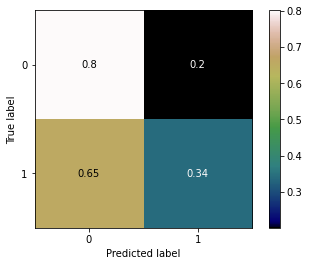

In [112]:
trMdl, trnY=valModel(train,'Train')

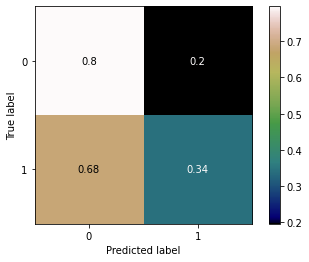

In [113]:
tstMdl, tstY=valModel(test,'Test')

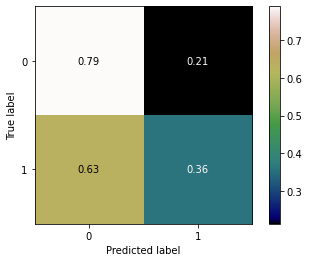

In [114]:
valMdl, valY=valModel(validate,'Validation')

In [115]:
FinalModels =  pd.DataFrame(columns=['Dataset','Accuracy','Precision','Recall','ROC-AUC Score',
                               'False Positive Rate'])
FinalModels=FinalModels.append(trMdl, ignore_index=True)
FinalModels=FinalModels.append(tstMdl, ignore_index=True)
FinalModels=FinalModels.append(valMdl, ignore_index=True)
FinalModels
#dfi.export(FinalModels,'ValidateModel.png')

,Dataset,Accuracy,Precision,Recall,ROC-AUC Score,False Positive Rate
0,Train,57.18%,0.63,0.34,0.57,0.20
1,Test,56.52%,0.64,0.34,0.57,0.20
2,Validation,57.67%,0.63,0.36,0.58,0.21


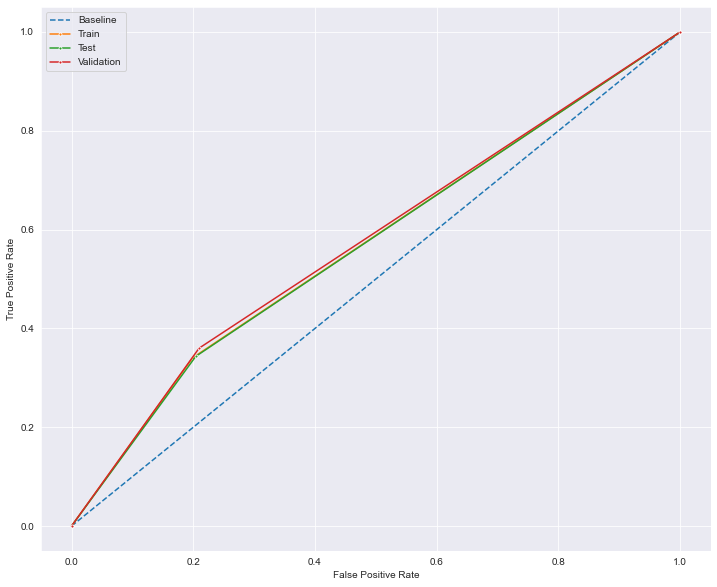

In [116]:
sns.set_style('darkgrid')
dfYtrain=trainDefault
dfYtest=testDefault
dfYval = validateDefault
noDefTrain=[0 for _ in range(len(trnY))]
trnNoDef_fpr, trnNoDef_tpr, _ = roc_curve(trnY,noDefTrain)
trnDef_fpr, trnDef_tpr, _ = roc_curve(dfYtrain,trnY)
tstDef_fpr, tstDef_tpr, _ = roc_curve(dfYtest,tstY)
valDef_fpr, valDef_tpr, _ = roc_curve(dfYval,valY)
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(trnNoDef_fpr, trnNoDef_tpr, ax=ax, linestyle='--',label='Baseline')
sns.lineplot(trnDef_fpr,  trnDef_tpr, ax=ax, marker='.',label='Train')
sns.lineplot(tstDef_fpr,  tstDef_tpr, ax=ax, marker='.',label='Test')
sns.lineplot(valDef_fpr,  valDef_tpr, ax=ax, marker='.',label='Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
## add AUC scores to legend, make legend bigger, add title

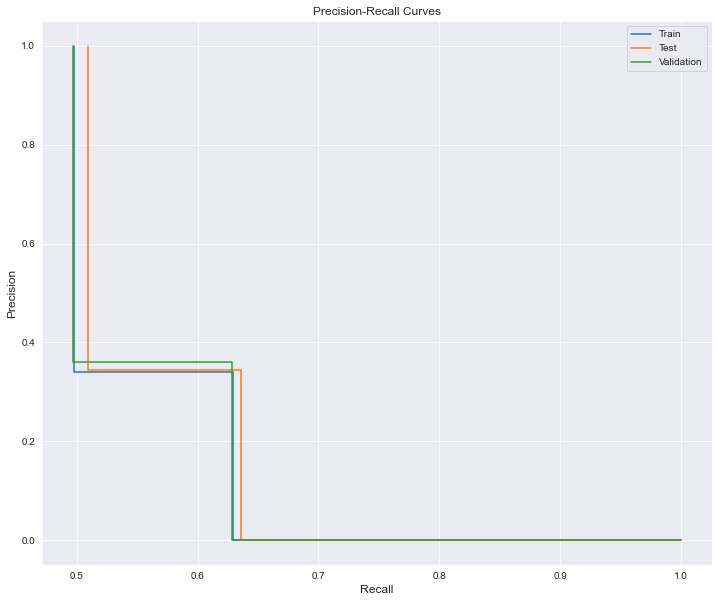

In [117]:
## Precision, recall curve
fig, ax = plt.subplots(figsize=(12,10))
trnPrec, trnReca, _ = precision_recall_curve(dfYtrain,trnY)
tstPrec, tstReca, _ = precision_recall_curve(dfYtest,tstY)
valPrec, valReca, _ = precision_recall_curve(dfYval,valY)
sns.lineplot(trnPrec, trnReca, ax=ax,drawstyle='steps-pre',label='Train')
sns.lineplot(tstPrec, tstReca, ax=ax,drawstyle='steps-pre',label='Test')
sns.lineplot(valPrec, valReca, ax=ax,drawstyle='steps-pre',label='Validation')
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves", fontsize=12)
plt.legend()
plt.show()
## add precision scores into legend, move legend closer to graph/make figure smaller, make legend bigger

In [148]:
def ks(data=None,target=None, prob=None):
    data['target0']=1-data[target]
    data['bucket']=pd.qcut(data[prob], 20)
    grouped=data.groupby('bucket', as_index = False)
    kstable=pd.DataFrame()
    kstable['Min Probability']=grouped.min()[prob]
    kstable['Max Probability']=grouped.max()[prob]
    kstable['Target (Y=1)']=grouped.sum()[target]
    kstable['NonTarget (Y=0)']=grouped.sum()['target0']
    kstable=kstable.sort_values(by="Min Probability", ascending=False).reset_index(drop=True)
    kstable['Target Density']=(kstable['Target (Y=1)']/data[target].sum()).apply('{0:.2%}'.format)
    kstable['NonTarget Density']=(kstable['NonTarget (Y=0)']/data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['Target CDF']=(kstable['Target (Y=1)']/data[target].sum()).cumsum()
    kstable['NonTarget CDF']=(kstable['NonTarget (Y=0)']/data['target0'].sum()).cumsum()
    kstable['KS Stat']=np.round(kstable['Target CDF']-kstable['NonTarget CDF'], 3) * 100
    #Formating
    kstable['Target CDF']=kstable['Target CDF'].apply('{0:.2%}'.format)
    kstable['NonTarget CDF']=kstable['NonTarget CDF'].apply('{0:.2%}'.format)
    kstable.index=range(1,21)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    return(kstable)

In [149]:
#Train
random.seed(1234)
Xtrain=train.copy()
p=[]
for i in range(len(Xtrain)):
    x=random.random()
    p.append(x)
Xtrain.insert(len(Xtrain.columns),'p',p,True)
ksTrain = ks(data=Xtrain,target="DEFAULT", prob="p")

        Min Probability  Max Probability  Target (Y=1)  NonTarget (Y=0)  \
Decile                                                                    
1          0.9495179160     0.9999733260           229              827   
2          0.9022429377     0.9493176856           253              802   
3          0.8498648580     0.9022372233           237              819   
4          0.7983225377     0.8498171283           245              810   
5          0.7515432274     0.7983073632           248              807   
6          0.6994621009     0.7514861291           213              843   
7          0.6470175711     0.6993872896           233              822   
8          0.5982847179     0.6469291594           233              823   
9          0.5520708800     0.5982211340           215              840   
10         0.5036895180     0.5520527481           240              815   
11         0.4520982952     0.5036683938           221              835   
12         0.4023040800  

In [120]:
# Test
random.seed(4321)
Xtest=test.copy()
p=[]
for i in range(len(Xtest)):
    x=random.random()
    p.append(x)
Xtest.insert(len(Xtest.columns),'p',p,True)
ksTest = ks(data=Xtest,target="DEFAULT", prob="p")

            min_prob      max_prob  events  nonevents event_rate  \
Decile                                                             
1       0.9505914778  0.9999942593     238        228      5.01%   
2       0.9015608863  0.9504701133     250        216      5.27%   
3       0.8520378065  0.9015482225     257        208      5.41%   
4       0.8045711001  0.8519676713     229        237      4.82%   
5       0.7548530420  0.8044888762     246        219      5.18%   
6       0.7028751440  0.7547876976     229        237      4.82%   
7       0.6538050114  0.7028245422     232        234      4.89%   
8       0.5992360128  0.6536516144     253        212      5.33%   
9       0.5518550654  0.5992143973     229        237      4.82%   
10      0.5042036121  0.5518159735     225        240      4.74%   
11      0.4519771727  0.5041919775     237        229      4.99%   
12      0.4004429624  0.4516799805     238        228      5.01%   
13      0.3511660302  0.4002279374     244      

In [121]:
# Validate
random.seed(2314)
Xval=validate.copy()
p=[]
for i in range(len(Xval)):
    x=random.random()
    p.append(x)
Xval.insert(len(Xval.columns),'p',p,True)
ksVal = ks(data=Xval,target="DEFAULT", prob="p")

            min_prob      max_prob  events  nonevents event_rate  \
Decile                                                             
1       0.9474526255  0.9995587742     117        116      5.06%   
2       0.9000084976  0.9469475572     120        113      5.19%   
3       0.8453004675  0.8994881972     107        125      4.63%   
4       0.7960682162  0.8451438468     100        133      4.33%   
5       0.7468586262  0.7958003573     113        120      4.89%   
6       0.6983498294  0.7466659608     108        124      4.67%   
7       0.6442407422  0.6979084678     102        131      4.41%   
8       0.5931301272  0.6442112179     105        128      4.54%   
9       0.5437000121  0.5929811184     113        119      4.89%   
10      0.4879115845  0.5434135806     128        105      5.54%   
11      0.4380981244  0.4875268438     107        126      4.63%   
12      0.3884903523  0.4372214061     136         96      5.88%   
13      0.3471560891  0.3884328293     118      